In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

address = 'D:/HomeWork/Machine Learning/ML-HW01/ML-HW01/dataset2/saved_file.xlsx'

df = pd.read_excel(address)
data = df.sample(frac=1)
data.head(5)

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
195,165,2015,4.6,6,35400000,4000000.0,2602.0,1,16,5588384,15144,913,1499,4599000.0
146,207,2014,7.2,3,4190000,22500000.0,320.0,1,7,3281842,4968,445,2099,1899400.0
107,155,2014,5.9,1,191000000,125000000.0,3845.0,1,0,7908038,27312,3439,8533,1260000.0
165,55,2015,7.4,1,350000000,190000000.0,4004.0,7,-17,59056,330,8,39,11890000.0
204,129,2015,6.4,8,22300000,12000000.0,2893.0,1,7,6646785,16041,955,2787,253499.0


In [2]:
# extract Y and drop from data frame
y = data.iloc[:, 2].values
data = data.drop(['Ratings'] , axis=1)

In [3]:
#Prepare the data
# #convert labels to numbers
newMovie = pd.Series(data['Movie']).astype('category').cat.codes.values
data['Movie'] = newMovie

#GET X
X = data.iloc[:, :].values

#Normalise X so the values lie between -1 and 1.
mu = X.mean(0) 
sigma = X.std(0) # standard deviation: max(x)-min(x)
xn = (X - mu) / sigma
m,n = X.shape

#Add column of ones
X = np.hstack((np.ones((m, 1)), xn))

In [4]:
def cost_function_MSE(X, Y, theta):
    m = len(Y)
    J = np.sum((X.dot(theta)-Y) ** 2)/(2 * m)
    return J

In [5]:
def gradient_descent(X, Y , Theta , alpha , iterations , xTest , yTest ):
    cost_history = [0] * iterations
    test_cost_history = [0] * iterations
    step_history = [0] * iterations
    m = len(Y)
 
    for iteration in range(iterations):
 # Hypothesis Values
        h = X.dot(Theta)
    
 # Difference b/w Hypothesis and Actual Y
        loss = h - Y
    
 # Gradient Calculation
        gradient = X.T.dot(loss) / m
    
 # Changing Values of B using Gradient
        Theta = Theta - alpha * gradient
        step_history[iteration] = alpha * gradient
        alpha = alpha - 0.00001
    
 # New Cost Value
        cost = cost_function_MSE(X, Y, Theta)
        cost_history[iteration] = cost
        test_cost_history[iteration] = cost_function_MSE(xTest, yTest, Theta)
        step_history[iteration] = alpha * gradient
        
 
    return Theta, cost_history , test_cost_history , step_history

In [6]:
#60% of data for train 139
#40% of data for test 92
#all data is 231
m = 139

X_train = X[:m]
y_train = y[:m]

X_test = X[m:]
y_test = y[m:]

In [7]:
# Initial Coefficients
Theta = np.zeros(X_train.shape[1])

alpha = 0.02
iter_ = 1000

newTheta, cost_history , test_cost_history , step_history = gradient_descent(X_train, y_train, Theta, alpha, iter_ , X_test ,y_test)

print(newTheta)

[ 6.43554668  0.02283882  0.05841412 -0.08067762  0.297564    0.25878296
 -0.22536715 -0.16271914  0.12442155  0.22778195  0.09725768 -0.4247447
 -0.01274074 -0.04471489]


In [8]:
y_pred = np.matmul(X_train, newTheta)
print(y_pred)

[6.45414139 6.61175401 6.34439371 6.55460171 6.2718747  6.14730953
 6.57359265 6.65746734 6.54194745 7.09056731 6.5585246  6.46970339
 6.97246929 6.44259295 5.89847557 6.87783241 6.34528821 6.44383944
 5.90220278 6.09569462 6.02516018 5.77930967 6.72816461 6.64766957
 5.95584637 6.01590403 8.3905626  6.06130097 6.28772997 6.06849464
 6.9212243  6.57385489 6.2170527  6.32607946 5.71326523 6.19101588
 6.64712283 7.73211072 6.74588869 6.22527474 6.76773895 6.45513838
 7.12800994 6.76498421 6.71595835 6.04683326 6.25916743 6.16025856
 5.99792913 6.99459725 6.35710046 6.35503036 6.51203071 6.32141946
 6.14566647 6.80109803 6.5473282  7.32623374 5.88857818 6.77531198
 6.33041856 6.31023212 5.72439749 6.32220575 5.75270685 6.06070555
 6.49897552 6.51986282 7.72859791 6.37497091 6.75345352 6.54007457
 6.12718258 7.18514682 6.53832366 5.89951738 6.46485647 6.6210864
 6.86512421 7.24533606 6.03103752 6.48261981 6.25289861 7.32687273
 5.41383698 7.45928681 6.50039088 6.72199374 6.6892137  7.66687

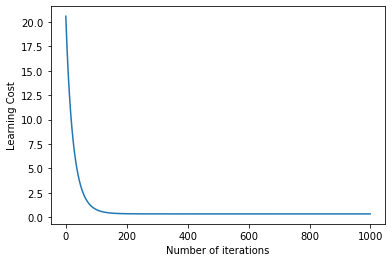

In [9]:
# Plot the convergence graph for learning cost
plt.plot(np.arange(iter_), cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Learning Cost')
plt.show()

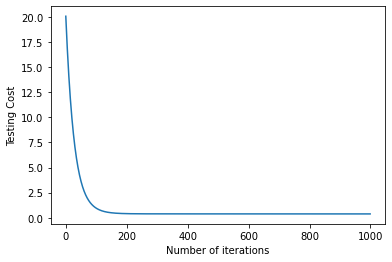

In [10]:
# Plot the convergence graph for testing cost
plt.plot(np.arange(iter_), test_cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Testing Cost')
plt.show()

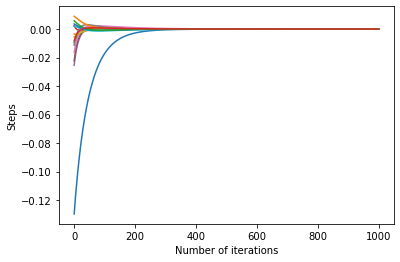

In [11]:
# Plot the convergence graph for thetas Step
plt.plot(np.arange(iter_), step_history)
plt.xlabel('Number of iterations')
plt.ylabel('Steps')
plt.show()

In [12]:
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(abs(r2))

In [13]:
r2(y_pred , y_train)

0.29422676096775846

In [14]:
cost_function_MSE(X_train , y_train , newTheta)

0.34095009856386327